In [1]:
import numpy as np 
import pandas
import tensorflow as tf 
from sklearn.preprocessing import StandardScaler #, PolynomialFeatures
import matplotlib.pyplot as plot
import seaborn

/Users/amin/Developer/Github/StockPredictor/.venv_ml/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 1. Loading Data
Just Loading the data from the source (This his experimental and used only in Jupyter Notebook)

In [216]:
data_path = "~/.cache/kagglehub/datasets/rizkykiky/gold-price-dataset/versions/1/Daily.csv"
data_path_1 = "~/.cache/kagglehub/datasets/sahilwagh/gold-stock-prices/versions/3/goldstock v1.csv"
data_path_2 = "~/.cache/kagglehub/datasets/sahilwagh/gold-stock-prices/versions/3/goldstock v2.csv"


In [217]:
data = pandas.read_csv(data_path_2)
data.describe()

,Unnamed: 0,Close/Last,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1259.864596,1541.176902,190261.189168,1541.136041,1551.244843,1530.976344
std,728.488698,333.631989,96871.355690,333.699364,336.375007,330.790580
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1251.300000,133774.000000,1250.650000,1258.500000,1243.900000
50%,1259.000000,1409.700000,181273.000000,1404.600000,1418.900000,1401.400000
75%,1888.500000,1832.050000,238157.500000,1833.000000,1844.000000,1819.450000
max,2528.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000


## 2. Data Cleaning
* Handling missing values [Not aplication for this data]
* Checking out about the currect naming in header


In [218]:

data_temp = data.copy()
data_temp.rename(columns={'Unnamed: 0':'Index', 'Close/Last':'Close'}, inplace=True)

data_temp.describe()
# data_temp.describe(), data_temp.shape, data_temp.columns.values

,Index,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1259.864596,1541.176902,190261.189168,1541.136041,1551.244843,1530.976344
std,728.488698,333.631989,96871.355690,333.699364,336.375007,330.790580
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1251.300000,133774.000000,1250.650000,1258.500000,1243.900000
50%,1259.000000,1409.700000,181273.000000,1404.600000,1418.900000,1401.400000
75%,1888.500000,1832.050000,238157.500000,1833.000000,1844.000000,1819.450000
max,2528.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000


Adding `diff` does not sounds greate after normalization. So commented it out for now.

In [5]:
# data_temp["diff"] = data_temp.Close - data_temp.Open

# print(data_temp.shape)
# data_temp.describe()

## 3. Feature Creation
[Need to implement]

In [219]:
data_temp.Date.agg(['min', 'max'])

min    2014-07-07
max    2024-07-03
Name: Date, dtype: object

For extracting which frequencies are important for features, using Fast Fourier Transform. [This should be done for datasets with timeframe lower than 1Day]

/var/folders/qz/1m239zsj3yn94cx9gr3qvx800000gq/T/ipykernel_73590/3913866395.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plot.xlim([-10000000000, max(plot.xlim())])


(0.06999512826476571, 179.29819276175905)

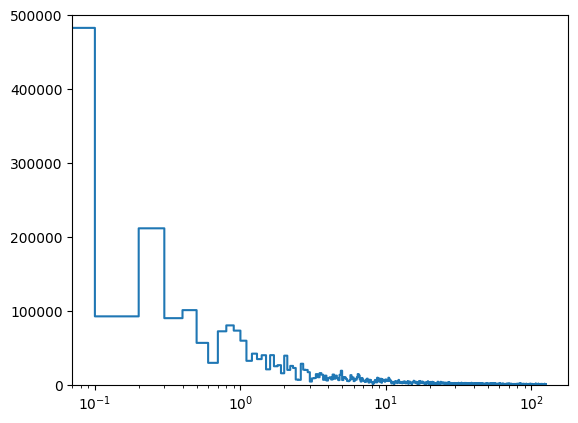

In [ ]:
# _fft = tf.signal.rfft(data_temp.Close)
# f_per_dataset = np.arange(0, len(_fft))

# n_samples_d = len(data_temp.Close)
# years_per_dataset = 10 #n_samples_d / 0

# f_per_year = f_per_dataset / years_per_dataset

# plot.step(f_per_year, np.abs(_fft))
# plot.xscale('log')
# plot.ylim(0, 500000)
# plot.xlim([-10000000000, max(plot.xlim())])
# plot.xticks([1,3])

## 4. Sequence Creation
Time sereis to supervised learning

In [220]:
# Sequence Creation
def add_lookback_window(data, 
                        lookback_length,
                        from_column = 'Close',
                        as_column = 'lookback_close'):
    data[as_column] = np.zeros(len(data))
    for i in range(lookback_length, len(data)):
        data.loc[i,as_column] = data.loc[i - lookback_length, from_column]
    return data
    

In [221]:
add_lookback_window(data_temp, lookback_length=40, from_column='Close', as_column='lookback_40')
data_temp.describe()

,Index,Close,Volume,Open,High,Low,lookback_40
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1259.864596,1541.176902,190261.189168,1541.136041,1551.244843,1530.976344,1520.424771
std,728.488698,333.631989,96871.355690,333.699364,336.375007,330.790580,384.476333
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000,0.000000
25%,630.500000,1251.300000,133774.000000,1250.650000,1258.500000,1243.900000,1244.300000
50%,1259.000000,1409.700000,181273.000000,1404.600000,1418.900000,1401.400000,1409.700000
75%,1888.500000,1832.050000,238157.500000,1833.000000,1844.000000,1819.450000,1832.050000
max,2528.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000,2438.500000


## 5. Data Splitting
Split the data as:
* **Training set**: Olders 70% of data
* **Validation set**:  Next 10% of data
* **Test set**: Most recent 20% of data.


In [222]:
# Splitting Data
_train_size = int(0.7 * len(data_temp))
_valid_size = int(0.1 * len(data_temp))

data_temp_train = data_temp[:_train_size]
data_temp_validation = data_temp[_train_size:_train_size + _valid_size]
data_temp_test = data_temp[_train_size + _valid_size:]

data_temp_train.shape, data_temp_validation.shape, data_temp_test.shape

((1757, 8), (251, 8), (503, 8))

## 6. Data Transformation


### Normalize Using StandardScaler
This function use StandardScaler to normalize the passed columns.


<Caption>
It turns out that the method below (`normalized_using_scaler`) does not working as expected. 
The values for `High_norm` is not always greater than `Low_norm`!</Caption>

In [223]:
def normalize_using_scaler(data, columns):
    scaler = StandardScaler()
    print(len(columns))
    data_normalized = scaler.fit_transform(data[columns].values.reshape(-1,len(columns)))

    columns_header_for_normalzied = [f"{col}_norm" for col in columns]
    data[columns_header_for_normalzied] = data_normalized

    return data, scaler

In this method, normalization is fited based on the `base_column`. Other mentioned `columns` only transformed based on the __fitted__ model.
✅

In [224]:
def normalize_using_scaler_based_on(data,base_column, columns):
    _scaler = StandardScaler()
    normalized_based_col = _scaler.fit_transform(data[base_column].values.reshape(-1, 1))

    data[f'{base_column}_norm'] = normalized_based_col

    for col in columns:
        if col != base_column:
            _normalized_col = _scaler.transform(data[col].values.reshape(-1,1))
            data[f'{col}_norm'] = _normalized_col
        
    return data, _scaler

def transform_using_scaler(data, scaler, columns):
    
    for col in columns:
        data[f'{col}_norm'] = scaler.transform(data[col].values.reshape(-1,1))
    
    return data
        

In [225]:
# Normalizing Train Data
_price_columns_to_normalize = ['Open', 'High', 'Low', 'lookback_40', 'Close']
data_train_normalized, train_prices_scaler = normalize_using_scaler_based_on(data_temp_train, base_column='Close', columns=_price_columns_to_normalize)

data_train_normalized, train_volume_scaler = normalize_using_scaler(data_train_normalized, columns=['Volume'])
data_train_normalized.describe()


1


/var/folders/qz/1m239zsj3yn94cx9gr3qvx800000gq/T/ipykernel_48611/1692925493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{base_column}_norm'] = normalized_based_col
/var/folders/qz/1m239zsj3yn94cx9gr3qvx800000gq/T/ipykernel_48611/1692925493.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_norm'] = _normalized_col
/var/folders/qz/1m239zsj3yn94cx9gr3qvx800000gq/T/ipykernel_48611/1692925493.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Index,Close,Volume,Open,High,Low,lookback_40,Close_norm,Open_norm,High_norm,Low_norm,lookback_40_norm,Volume_norm
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1.757000e+03,1757.000000,1757.000000,1757.000000,1757.000000,1.757000e+03
mean,881.032442,1680.374388,203923.364257,1680.364257,1691.088219,1669.366534,1651.636824,5.823458e-16,-0.000033,0.035269,-0.036237,-0.094602,1.132339e-16
std,509.243812,303.858651,103939.472336,303.900761,307.140548,300.653159,389.644902,1.000285e+00,1.000423,1.011089,0.989732,1.282688,1.000285e+00
min,0.000000,1182.300000,1.000000,1180.700000,1189.000000,1167.100000,0.000000,-1.639631e+00,-1.644899,-1.617575,-1.689669,-5.531693,-1.962492e+00
25%,442.000000,1332.800000,146441.000000,1334.600000,1341.700000,1327.300000,1332.800000,-1.144194e+00,-1.138269,-1.114896,-1.162300,-1.144194,-5.531944e-01
50%,881.000000,1763.900000,196788.000000,1765.000000,1776.000000,1753.500000,1763.900000,2.749614e-01,0.278583,0.314794,0.240725,0.274961,-6.866877e-02
75%,1321.000000,1905.000000,256446.000000,1903.500000,1915.600000,1890.300000,1905.000000,7.394542e-01,0.734516,0.774349,0.691063,0.739454,5.054633e-01
max,1762.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000,2438.500000,2.495705e+00,2.472661,2.547388,2.405505,2.495705,5.613456e+00


In [226]:
# Normalizing Validation and Test data
data_validation_normalized = transform_using_scaler(data=data_temp_validation, 
                                                    scaler=train_prices_scaler, 
                                                    columns=_price_columns_to_normalize)
data_validation_normalized = transform_using_scaler(data=data_validation_normalized, 
                                                    scaler=train_volume_scaler,
                                                    columns=['Volume'])

data_test_normalized = transform_using_scaler(data=data_temp_test,
                                              scaler=train_prices_scaler, 
                                              columns=_price_columns_to_normalize)
data_test_normalized = transform_using_scaler(data=data_test_normalized,
                                              scaler=train_volume_scaler,
                                              columns=['Volume'])

# data_validation_normalized.describe()
data_test_normalized.describe()

/var/folders/qz/1m239zsj3yn94cx9gr3qvx800000gq/T/ipykernel_48611/1692925493.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_norm'] = scaler.transform(data[col].values.reshape(-1,1))
/var/folders/qz/1m239zsj3yn94cx9gr3qvx800000gq/T/ipykernel_48611/1692925493.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_norm'] = scaler.transform(data[col].values.reshape(-1,1))
/var/folders/qz/1m239zsj3yn94cx9gr3qvx800000gq/T/ipykernel_48611/1692925493.py:17: SettingWithCopyWarning: 
A va

,Index,Close,Volume,Open,High,Low,lookback_40,Open_norm,High_norm,Low_norm,lookback_40_norm,Close_norm,Volume_norm
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,2269.697813,1195.569781,141967.377734,1195.205368,1204.566203,1186.772167,1198.741551,-1.597148,-1.566332,-1.624909,-1.585507,-1.595948,-0.596247
std,149.493208,68.477753,56712.237436,68.307578,69.157064,67.840561,74.078821,0.224865,0.227661,0.223327,0.243863,0.225425,0.545783
min,2014.000000,1049.600000,390.000000,1051.500000,1062.700000,1045.400000,1049.600000,-2.070217,-2.033348,-2.090298,-2.076472,-2.076472,-1.958749
25%,2139.500000,1149.650000,107639.500000,1151.250000,1158.500000,1140.350000,1149.650000,-1.741846,-1.717980,-1.777728,-1.747113,-1.747113,-0.926609
50%,2268.000000,1200.400000,136394.000000,1200.700000,1208.900000,1191.300000,1200.400000,-1.579060,-1.552066,-1.610004,-1.580047,-1.580047,-0.649884
75%,2398.500000,1243.150000,174155.500000,1241.800000,1250.650000,1231.500000,1243.150000,-1.443761,-1.414627,-1.477668,-1.439317,-1.439317,-0.286478
max,2528.000000,1339.200000,527205.000000,1345.000000,1362.600000,1338.500000,1372.600000,-1.104033,-1.046094,-1.125430,-1.013175,-1.123126,3.111173


In [227]:
_normalized_columns = ['Close_norm', 'Open_norm', 'High_norm', 'Low_norm', 'lookback_40_norm', 'Volume_norm']
_columns_indices = {name: i for i, name in enumerate(_normalized_columns)}
_normalized_columns


['Close_norm',
 'Open_norm',
 'High_norm',
 'Low_norm',
 'lookback_40_norm',
 'Volume_norm']

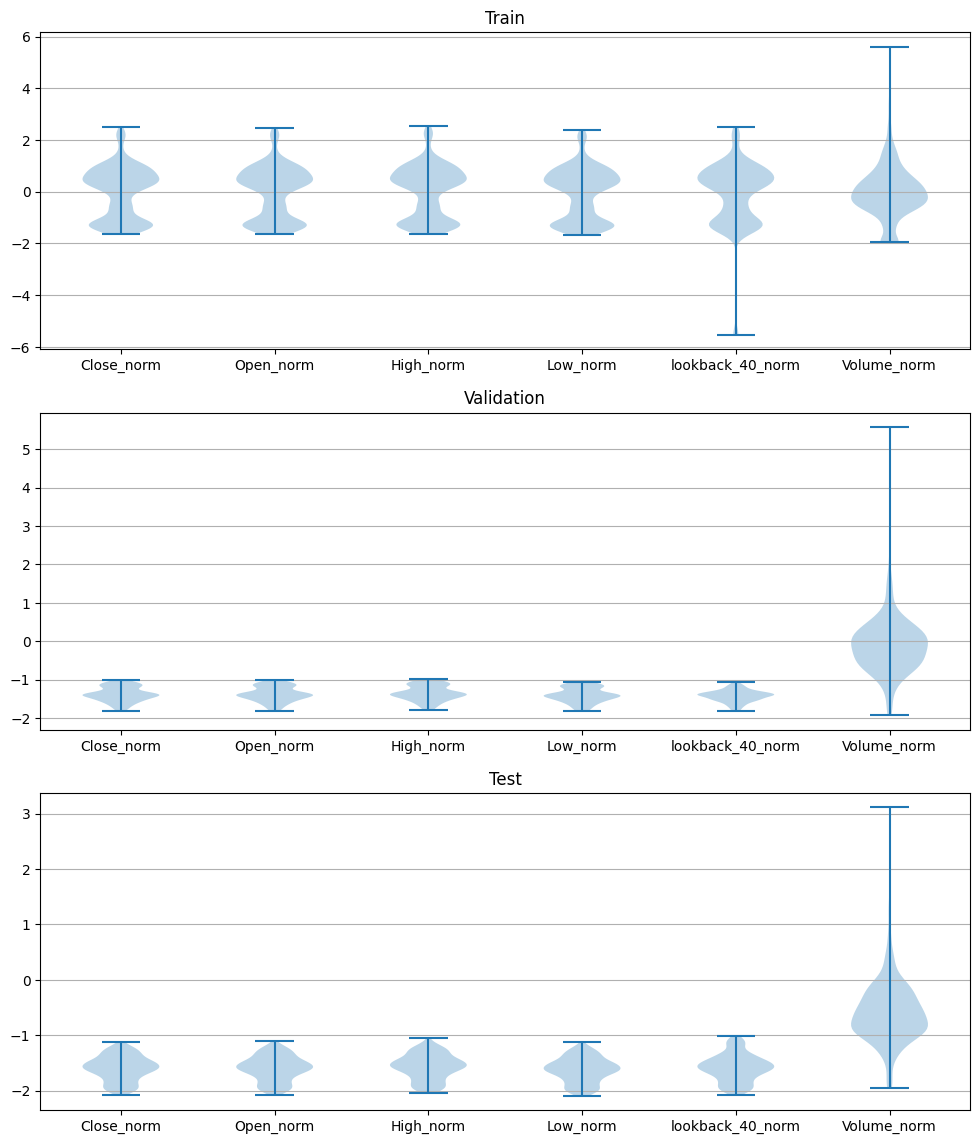

In [228]:

fig, axs = plot.subplots(nrows=3, ncols=1, figsize=(12,14))
axs[0].violinplot(data_train_normalized[_normalized_columns])
axs[0].set_title('Train')

axs[1].violinplot(data_validation_normalized[_normalized_columns])
axs[1].set_title('Validation')

axs[2].violinplot(data_test_normalized[_normalized_columns])
axs[2].set_title('Test')

for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(_normalized_columns))],
                   labels=_normalized_columns)
plot.show()

In [229]:

# data_test_normalized.drop(columns=['Volume_norm', 'y_1_norm'])
data_test_normalized.describe()

,Index,Close,Volume,Open,High,Low,lookback_40,Open_norm,High_norm,Low_norm,lookback_40_norm,Close_norm,Volume_norm
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,2269.697813,1195.569781,141967.377734,1195.205368,1204.566203,1186.772167,1198.741551,-1.597148,-1.566332,-1.624909,-1.585507,-1.595948,-0.596247
std,149.493208,68.477753,56712.237436,68.307578,69.157064,67.840561,74.078821,0.224865,0.227661,0.223327,0.243863,0.225425,0.545783
min,2014.000000,1049.600000,390.000000,1051.500000,1062.700000,1045.400000,1049.600000,-2.070217,-2.033348,-2.090298,-2.076472,-2.076472,-1.958749
25%,2139.500000,1149.650000,107639.500000,1151.250000,1158.500000,1140.350000,1149.650000,-1.741846,-1.717980,-1.777728,-1.747113,-1.747113,-0.926609
50%,2268.000000,1200.400000,136394.000000,1200.700000,1208.900000,1191.300000,1200.400000,-1.579060,-1.552066,-1.610004,-1.580047,-1.580047,-0.649884
75%,2398.500000,1243.150000,174155.500000,1241.800000,1250.650000,1231.500000,1243.150000,-1.443761,-1.414627,-1.477668,-1.439317,-1.439317,-0.286478
max,2528.000000,1339.200000,527205.000000,1345.000000,1362.600000,1338.500000,1372.600000,-1.104033,-1.046094,-1.125430,-1.013175,-1.123126,3.111173


/var/folders/qz/1m239zsj3yn94cx9gr3qvx800000gq/T/ipykernel_48611/2796942043.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plot.legend()


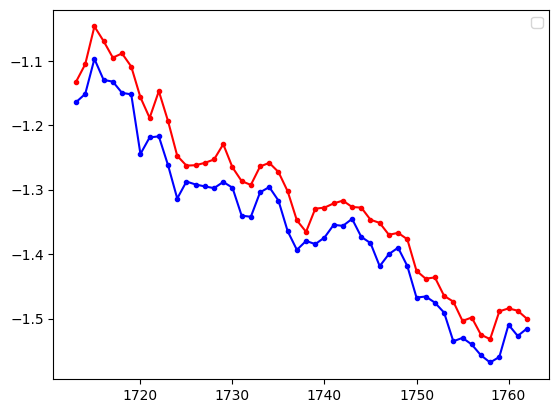

In [230]:

plot_range = range(len(data_train_normalized.Date) - 50, len(data_train_normalized.Date))
plot.plot(data_train_normalized.Index[plot_range], data_train_normalized.High_norm[plot_range], marker=".", color='red')
plot.plot(data_train_normalized.Index[plot_range], data_train_normalized.Low_norm[plot_range], marker= ".", color='blue')
plot.legend()
plot.show()

Manually checking the data, and make sure all the `High_norm` is greater than `Low_norm`.

In [231]:
data_temp_2 = data_train_normalized.copy()

high2low_proportion_for_norm_params = data_temp_2.High_norm < data_temp_2.Low_norm
high2low_proportion = data_temp_2.High < data_temp_2.Low
print(high2low_proportion_for_norm_params.sum() / len(high2low_proportion_for_norm_params),
      high2low_proportion.sum() / len(high2low_proportion))

del data_temp_2

0.0 0.0


## Data Windowing
The main features of the input windows are: 
 * The width (number of time steps) of the input and label widows.
 * The time offset between them.
 * Which features are used as inputs, labels, or both.

In [302]:
## Data Windowing
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):

    print(f'\n>splitting_window,\tlabelSlice:{self.labels_slice}, labelWidth:{self.label_width}, \n\t\t\tinputSlice:{self.input_slice}, inputWidth:{self.input_width}')
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None]) # << What's wrong!?
    # ValueError: Tensor's shape (3, 3, 6) is not compatible with supplied shape [None, 2, None].


    return inputs, labels
  

  def plot(self, model=None, plot_col='Open_norm', max_subplots=3):
    inputs, labels = self.example
    plot.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plot.subplot(max_n, 1, n+1)
      plot.ylabel(f'{plot_col} [normed]')
      plot.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plot.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plot.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plot.legend()

    plot.xlabel('Time [?]')
  
  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.val))
      # And cache it for next time
      self._example = result
    return result

In [233]:

w1 = WindowGenerator(input_width=30,
                     label_width=3,
                     shift=30,
                     label_columns=_normalized_columns,
                     train_df=data_train_normalized[_normalized_columns], 
                     val_df=data_validation_normalized[_normalized_columns],
                     test_df=data_test_normalized[_normalized_columns])

w2 = WindowGenerator(input_width=10,
                     label_width=3,
                     shift=3,
                     label_columns=['Close_norm'], #_normalized_columns,
                     train_df=data_train_normalized[_normalized_columns], 
                     val_df=data_validation_normalized[_normalized_columns],
                     test_df=data_test_normalized[_normalized_columns])

'W1', w1, '\nW2',w2

('W1',
 Total window size: 60
 Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 Label indices: [57 58 59]
 Label column name(s): ['Close_norm', 'Open_norm', 'High_norm', 'Low_norm', 'lookback_40_norm', 'Volume_norm'],
 '\nW2',
 Total window size: 13
 Input indices: [0 1 2 3 4 5 6 7 8 9]
 Label indices: [10 11 12]
 Label column name(s): ['Close_norm'])

In [234]:
# data_train_normalized.loc[:w2.total_window_size, _normalized_columns]
# _sample_window

w2.input_width, w2.label_width, w2.labels_slice, w2.total_window_size

(10, 3, slice(10, None, None), 13)

In [235]:
# _temp_features = data_train_normalized.loc[:w2.total_window_size, _normalized_columns]
# _temp_labels = _temp_features[:, w2.labels_slice, :]
_sample_window.shape, _sample_window[:,w2.labels_slice,:].shape

(TensorShape([3, 13, 6]), TensorShape([3, 3, 6]))

In [236]:

_sample_window = tf.stack([(data_train_normalized.loc[:w2.total_window_size - 1, _normalized_columns]),
                           (data_train_normalized.loc[100:100+w2.total_window_size - 1, _normalized_columns]),
                           (data_train_normalized.loc[200:200+w2.total_window_size - 1, _normalized_columns])])

_sample_inputs, _sample_labels = w2.split_window(_sample_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {_sample_window.shape}')
print(f'Inputs shape: {_sample_inputs.shape}')
print(f'Labels shape: {_sample_labels.shape}')


>splitting_window,	labelSlice:slice(10, None, None), labelWidth:3, 
			inputSlice:slice(0, 10, None), inputWidth:10
All shapes are: (batch, time, features)
Window shape: (3, 13, 6)
Inputs shape: (3, 10, 6)
Labels shape: (3, 3, 1)



>splitting_window,	labelSlice:slice(10, None, None), labelWidth:3, 
			inputSlice:slice(0, 10, None), inputWidth:10


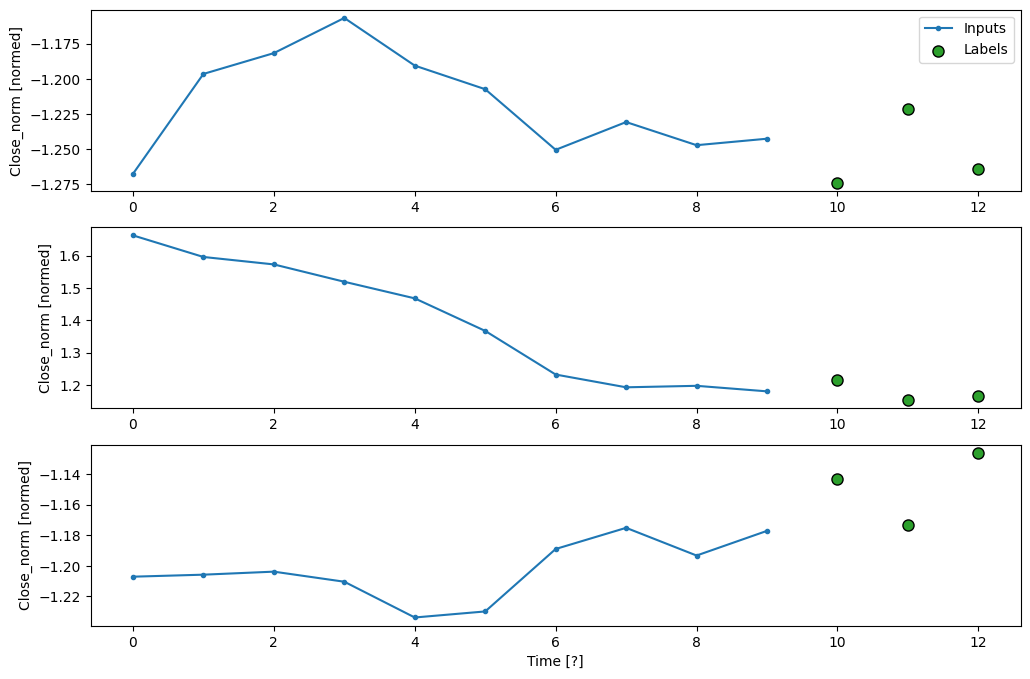

In [237]:
w2.plot(plot_col='Close_norm')

In [238]:
data_train_normalized.describe()

,Index,Close,Volume,Open,High,Low,lookback_40,Close_norm,Open_norm,High_norm,Low_norm,lookback_40_norm,Volume_norm
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1.757000e+03,1757.000000,1757.000000,1757.000000,1757.000000,1.757000e+03
mean,881.032442,1680.374388,203923.364257,1680.364257,1691.088219,1669.366534,1651.636824,5.823458e-16,-0.000033,0.035269,-0.036237,-0.094602,1.132339e-16
std,509.243812,303.858651,103939.472336,303.900761,307.140548,300.653159,389.644902,1.000285e+00,1.000423,1.011089,0.989732,1.282688,1.000285e+00
min,0.000000,1182.300000,1.000000,1180.700000,1189.000000,1167.100000,0.000000,-1.639631e+00,-1.644899,-1.617575,-1.689669,-5.531693,-1.962492e+00
25%,442.000000,1332.800000,146441.000000,1334.600000,1341.700000,1327.300000,1332.800000,-1.144194e+00,-1.138269,-1.114896,-1.162300,-1.144194,-5.531944e-01
50%,881.000000,1763.900000,196788.000000,1765.000000,1776.000000,1753.500000,1763.900000,2.749614e-01,0.278583,0.314794,0.240725,0.274961,-6.866877e-02
75%,1321.000000,1905.000000,256446.000000,1903.500000,1915.600000,1890.300000,1905.000000,7.394542e-01,0.734516,0.774349,0.691063,0.739454,5.054633e-01
max,1762.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000,2438.500000,2.495705e+00,2.472661,2.547388,2.405505,2.495705,5.613456e+00


In [239]:
w2.train.element_spec


>splitting_window,	labelSlice:slice(10, None, None), labelWidth:3, 
			inputSlice:slice(0, 10, None), inputWidth:10


(TensorSpec(shape=(None, 10, 6), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 3, 1), dtype=tf.float32, name=None))

In [240]:
for _example_input, _example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {_example_input.shape}')
    print(f'Labels shape (batch, time, features): {_example_labels.shape}')


>splitting_window,	labelSlice:slice(10, None, None), labelWidth:3, 
			inputSlice:slice(0, 10, None), inputWidth:10
Inputs shape (batch, time, features): (32, 10, 6)
Labels shape (batch, time, features): (32, 3, 1)


2025-04-29 11:28:51.563967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Feature Engineering Techniques
*[Implement if needed]* 

# Model Training and Evaluation


## Single Step Models [temp]
Here we jsut start testing some basic models. (May be removed later!)

In [241]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [242]:
single_step_window = WindowGenerator(input_width=1,
                                     label_width=1,
                                     shift=1,
                                     label_columns=['Close_norm'],
                                     train_df=data_train_normalized[_normalized_columns],
                                     val_df=data_validation_normalized[_normalized_columns],
                                     test_df=data_test_normalized[_normalized_columns])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Close_norm']

In [244]:
baseline = Baseline(label_index=_columns_indices['Close_norm'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)


>splitting_window,	labelSlice:slice(1, None, None), labelWidth:1, 
			inputSlice:slice(0, 1, None), inputWidth:1
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1211e-04 - mean_absolute_error: 0.0220 

>splitting_window,	labelSlice:slice(1, None, None), labelWidth:1, 
			inputSlice:slice(0, 1, None), inputWidth:1


In [245]:
wide_window = WindowGenerator(input_width=24, 
                              label_width=24,
                              shift=1,
                              label_columns=['Close_norm'],
                              train_df=data_train_normalized[_normalized_columns],
                              val_df=data_validation_normalized[_normalized_columns],
                              test_df=data_test_normalized[_normalized_columns])
wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Close_norm']


>splitting_window,	labelSlice:slice(1, None, None), labelWidth:24, 
			inputSlice:slice(0, 24, None), inputWidth:24


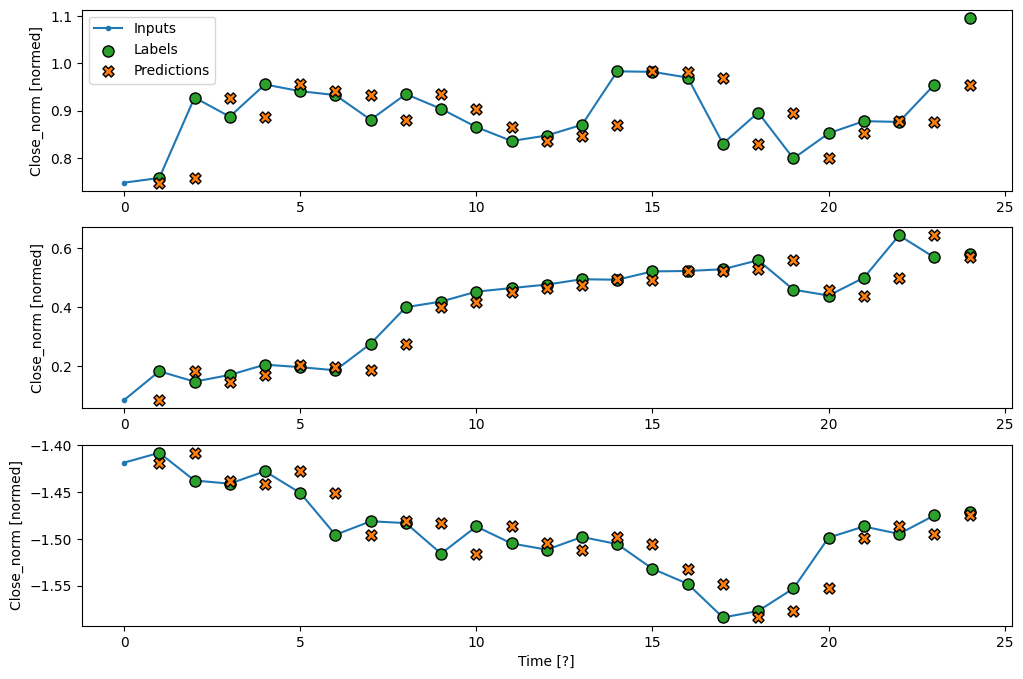

In [246]:
wide_window.plot(model=baseline, plot_col='Close_norm')

## Linear Model [temp]

In [247]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Normalization
from tensorflow.keras.optimizers import Adam


In [254]:
linear_model = tf.keras.Sequential([
    Dense(units=1)
])
linear_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [299]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  _early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=patience,
                                                     mode='min',
                                                     max_epochs=20)

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  _history = model.fit(window.train, epochs=max_epochs,
                       validation_data=window.val,
                       callbacks=[_early_stopping])
  return _history

In [256]:
_history_linear_model = compile_and_fit(linear_model, single_step_window,patience=10)

val_performance['Linear'] = linear_model.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear_model.evaluate(single_step_window.test, return_dict=True)


>splitting_window,	labelSlice:slice(1, None, None), labelWidth:1, 
			inputSlice:slice(0, 1, None), inputWidth:1

>splitting_window,	labelSlice:slice(1, None, None), labelWidth:1, 
			inputSlice:slice(0, 1, None), inputWidth:1
Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9894 - mean_absolute_error: 0.9048 - val_loss: 1.0931 - val_mean_absolute_error: 0.8901
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7924 - mean_absolute_error: 0.8339 - val_loss: 0.7799 - val_mean_absolute_error: 0.7247
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4364 - mean_absolute_error: 0.7491 - val_loss: 0.5703 - val_mean_absolute_error: 0.5959
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2483 - mean_absolute_error: 0.6986 - val_loss: 0.4268 - val_mean_absolute_error: 0.4955
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0981 - mean_absolute_error: 0.6528 - val_loss: 0.3302 - val_mean_absolute_error: 0.4221
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━

In [257]:
val_performance, performance

({'Baseline': {'loss': 0.0010007319506257772,
   'mean_absolute_error': 0.022827638313174248},
  'Linear': {'loss': 0.018014781177043915,
   'mean_absolute_error': 0.09131723642349243}},
 {'Baseline': {'loss': 0.001544587081298232,
   'mean_absolute_error': 0.028647758066654205},
  'Linear': {'loss': 0.0143015431240201,
   'mean_absolute_error': 0.09515485167503357}})

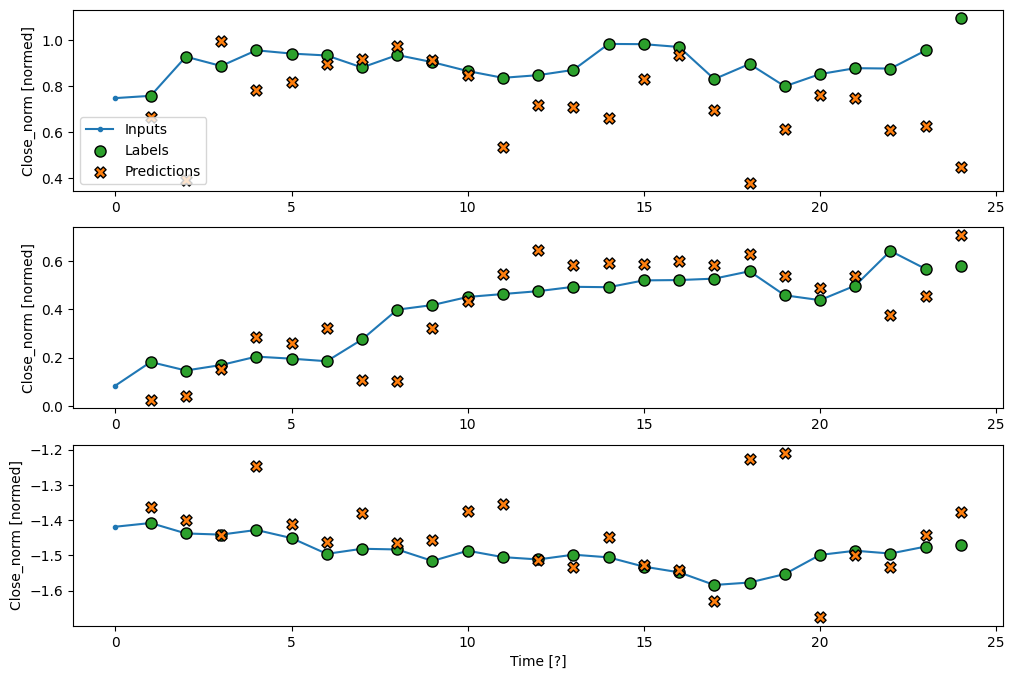

In [258]:
wide_window.plot(model=linear_model, plot_col='Close_norm')

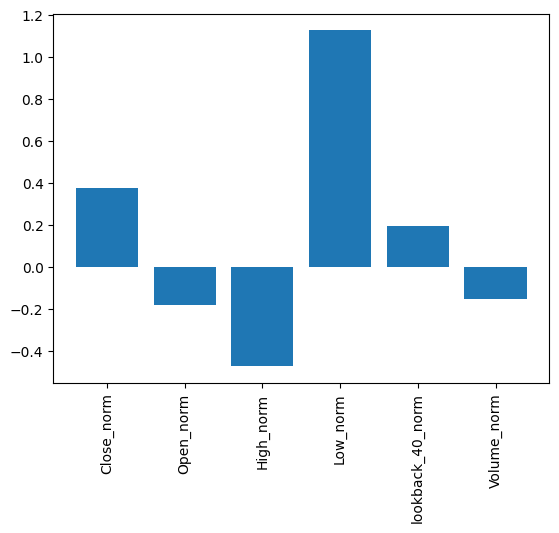

In [259]:
plot.bar(x = range(len(_normalized_columns)),
         height=linear_model.layers[0].kernel[:,0].numpy())
axis = plot.gca()
axis.set_xticks(range(len(_normalized_columns)))
_ = axis.set_xticklabels(_normalized_columns, rotation=90)

## Dense [temp]

In [261]:
dense_model = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])
dense_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [263]:
_history_dense_model = compile_and_fit(dense_model, single_step_window)
 
val_performance['Dense'] = dense_model.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense_model.evaluate(single_step_window.test, return_dict=True)


>splitting_window,	labelSlice:slice(1, None, None), labelWidth:1, 
			inputSlice:slice(0, 1, None), inputWidth:1

>splitting_window,	labelSlice:slice(1, None, None), labelWidth:1, 
			inputSlice:slice(0, 1, None), inputWidth:1
Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.8056 - mean_absolute_error: 0.6112 - val_loss: 0.0074 - val_mean_absolute_error: 0.0790
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0410 - val_loss: 6.6905e-04 - val_mean_absolute_error: 0.0202
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0266 - val_loss: 4.8880e-04 - val_mean_absolute_error: 0.0163
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0256 - val_loss: 4.8858e-04 - val_mean_absolute_error: 0.0163
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0256 - val_loss: 8.4343e-04 - val_mean_absolute_error: 0.0236
Epoch 6/20
55/5

In [301]:
print(f'>Validation:\n\t{val_performance},\n>Test:\n\t{performance}')

>Validation:
	{'Baseline': {'loss': 0.0010007319506257772, 'mean_absolute_error': 0.022827638313174248}, 'Linear': {'loss': 0.018014781177043915, 'mean_absolute_error': 0.09131723642349243}, 'Dense': {'loss': 0.000709381652995944, 'mean_absolute_error': 0.02139241248369217}, 'Multi-Step Dense': {'loss': 0.00034520166809670627, 'mean_absolute_error': 0.013772604987025261}, 'Conv': {'loss': 0.0009033835958689451, 'mean_absolute_error': 0.023413874208927155}, 'LSTM': {'loss': 0.00213892525061965, 'mean_absolute_error': 0.028948402032256126}},
>Test:
	{'Baseline': {'loss': 0.001544587081298232, 'mean_absolute_error': 0.028647758066654205}, 'Linear': {'loss': 0.0143015431240201, 'mean_absolute_error': 0.09515485167503357}, 'Dense': {'loss': 0.0010644474532455206, 'mean_absolute_error': 0.027078263461589813}, 'Multi-Step Dense': {'loss': 0.0004372081602923572, 'mean_absolute_error': 0.015087016858160496}, 'Conv': {'loss': 0.0012488948414102197, 'mean_absolute_error': 0.029497062787413597}, '

## Multi-step Dense [temp]

In [268]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Close_norm'],
    train_df=data_train_normalized[_normalized_columns],
    val_df=data_validation_normalized[_normalized_columns],
    test_df=data_test_normalized[_normalized_columns])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Close_norm']


>splitting_window,	labelSlice:slice(3, None, None), labelWidth:1, 
			inputSlice:slice(0, 3, None), inputWidth:3


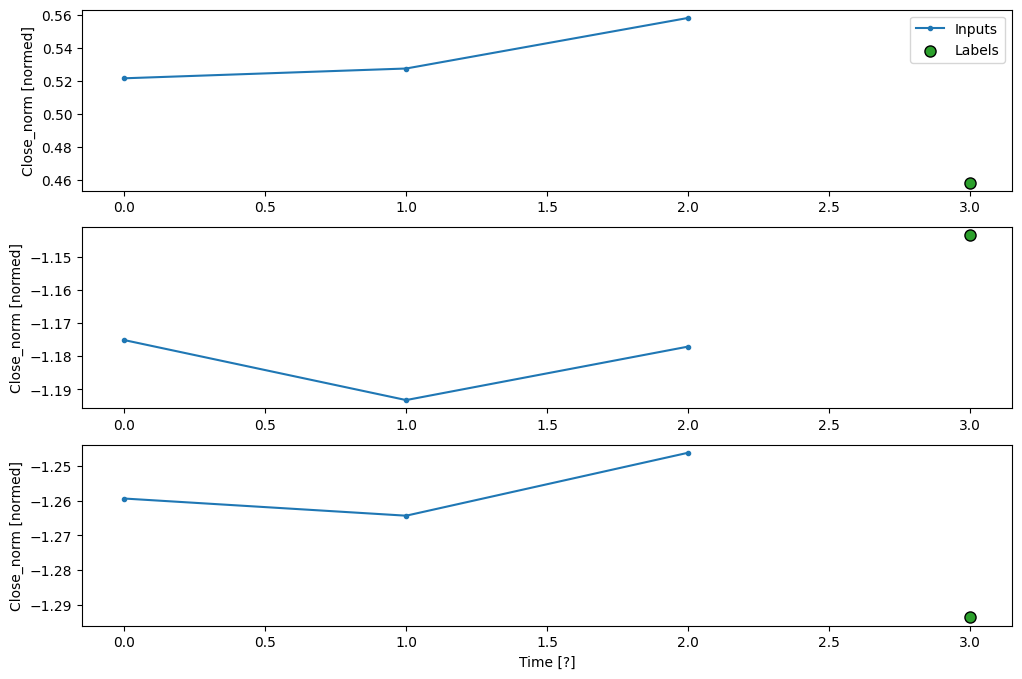

In [ ]:
conv_window.plot(plot_col='Close_norm')

In [271]:
multi_step_dense_model = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense_model(conv_window.example[0]).shape)

multi_step_dense_model.summary()

Input shape: (32, 3, 6)
Output shape: (32, 1, 1)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (32, 18)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (32, 32)               │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (32, 32)               │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (32, 1)                │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (32, 1, 1)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,697 (6.63 KB)

 Trainable params: 1,697 (6.63 KB)

 Non-trainable params: 0 (0.00 B)

In [276]:
_history_multi_step_model = compile_and_fit(multi_step_dense_model, conv_window, patience=5)

val_performance['Multi-Step Dense'] = multi_step_dense_model.evaluate(conv_window.val, return_dict=True)
performance['Multi-Step Dense'] = multi_step_dense_model.evaluate(conv_window.test, return_dict=True)


>splitting_window,	labelSlice:slice(3, None, None), labelWidth:1, 
			inputSlice:slice(0, 3, None), inputWidth:3

>splitting_window,	labelSlice:slice(3, None, None), labelWidth:1, 
			inputSlice:slice(0, 3, None), inputWidth:3
Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0090 - mean_absolute_error: 0.0686 - val_loss: 5.6247e-04 - val_mean_absolute_error: 0.0176
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0237 - val_loss: 3.7618e-04 - val_mean_absolute_error: 0.0145
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0222 - val_loss: 6.2137e-04 - val_mean_absolute_error: 0.0194
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0228 - val_loss: 4.3332e-04 - val_mean_absolute_error: 0.0156
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5585e-04 - mean_absolute_error: 0.0218 - val_loss: 6.7913e-04 - val_mean_absolute_error: 0.0220
Epoch 6/

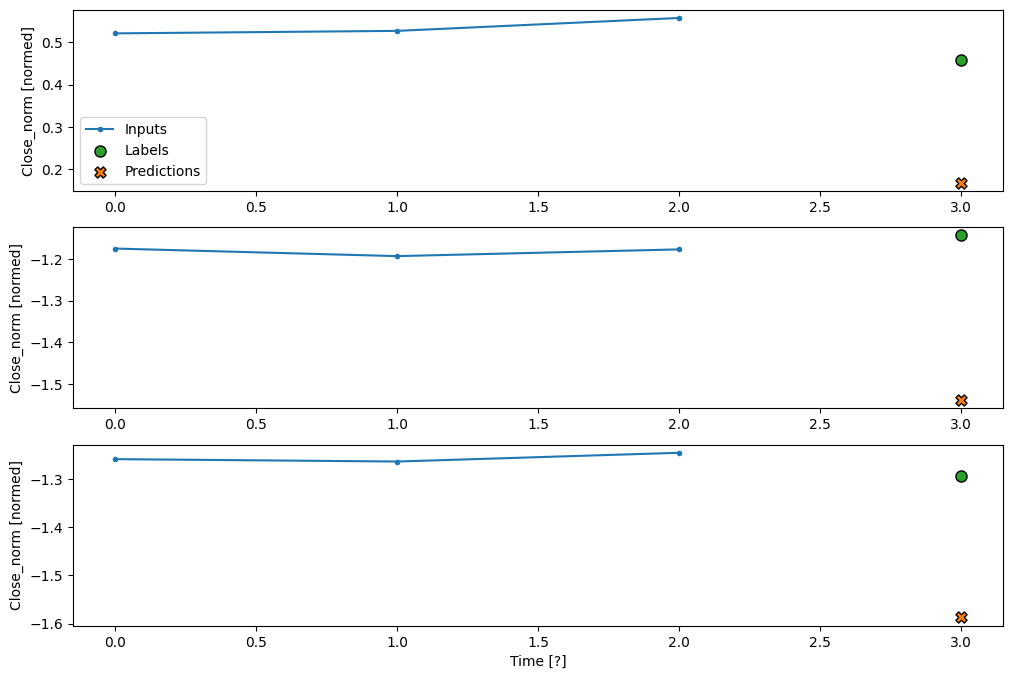

In [312]:
conv_window.plot(model=multi_step_dense_model, plot_col='Close_norm')

## Convolutional Neural Network


In [ ]:
conv_model = Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

conv_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [284]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 6)
Output shape: (32, 1, 1)


In [291]:
_history_conv_model = compile_and_fit(conv_model, conv_window, patience=5)

val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, return_dict=True)


>splitting_window,	labelSlice:slice(3, None, None), labelWidth:1, 
			inputSlice:slice(0, 3, None), inputWidth:3

>splitting_window,	labelSlice:slice(3, None, None), labelWidth:1, 
			inputSlice:slice(0, 3, None), inputWidth:3
Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0371 - val_loss: 9.1382e-04 - val_mean_absolute_error: 0.0229
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0302 - val_loss: 0.0015 - val_mean_absolute_error: 0.0294
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0292 - val_loss: 0.0013 - val_mean_absolute_error: 0.0281
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0263 - val_loss: 8.4499e-04 - val_mean_absolute_error: 0.0221
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0286 - val_loss: 0.0016 - val_mean_absolute_error: 0.0325
Epoch 6/20
55/55 ━━━━━━

In [292]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 6)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [304]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Close_norm'],
    train_df=data_train_normalized[_normalized_columns],
    val_df=data_validation_normalized[_normalized_columns],
    test_df=data_test_normalized[_normalized_columns])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['Close_norm']

In [305]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window

>splitting_window,	labelSlice:slice(3, None, None), labelWidth:24, 
			inputSlice:slice(0, 26, None), inputWidth:26
Input shape: (32, 26, 6)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


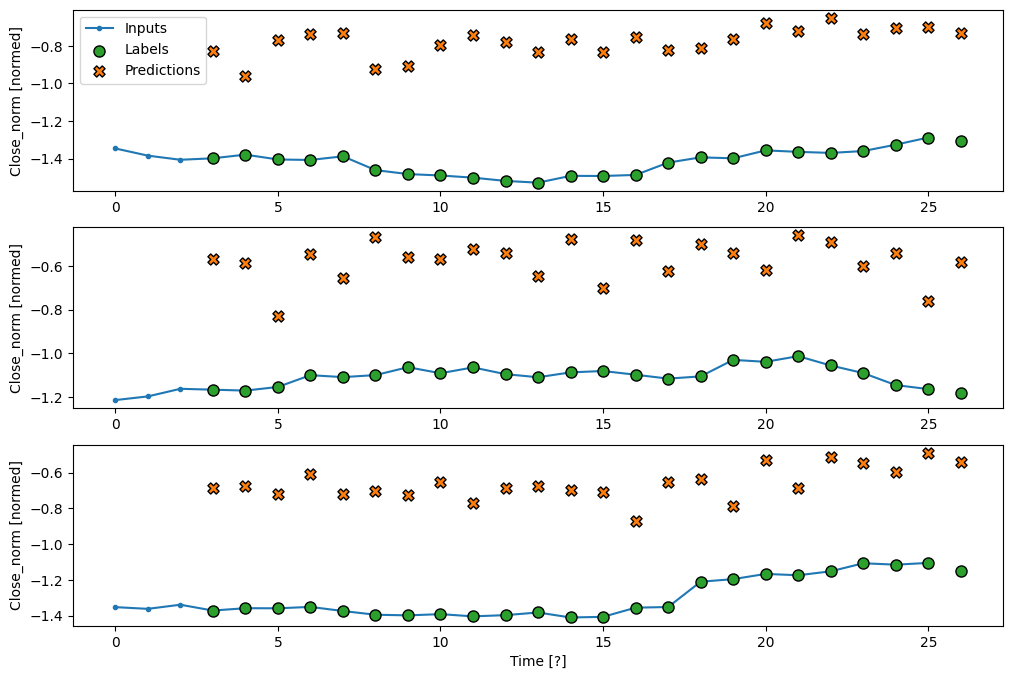

In [306]:
wide_conv_window.plot(model=conv_model, plot_col='Close_norm')

## Recurrent Neural Network (RNN)

In [297]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

lstm_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
_history_lstm_model = compile_and_fit(model=lstm_model, window=wide_window, patience=5)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, return_dict=True)


>splitting_window,	labelSlice:slice(1, None, None), labelWidth:24, 
			inputSlice:slice(0, 24, None), inputWidth:24

>splitting_window,	labelSlice:slice(1, None, None), labelWidth:24, 
			inputSlice:slice(0, 24, None), inputWidth:24
Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.3476 - mean_absolute_error: 0.4137 - val_loss: 0.1105 - val_mean_absolute_error: 0.2142
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0611 - mean_absolute_error: 0.1490 - val_loss: 0.0687 - val_mean_absolute_error: 0.1552
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0329 - mean_absolute_error: 0.1058 - val_loss: 0.0459 - val_mean_absolute_error: 0.1205
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0244 - mean_absolute_error: 0.0894 - val_loss: 0.0339 - val_mean_absolute_error: 0.1027
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0194 - mean_absolute_error: 0.0797 - val_loss: 0.0263 - val_mean_absolute_error: 0.0890
Epoch 6/20
55/55 ━━━━

Input shape: (32, 24, 6)
Output shape: (32, 24, 1)


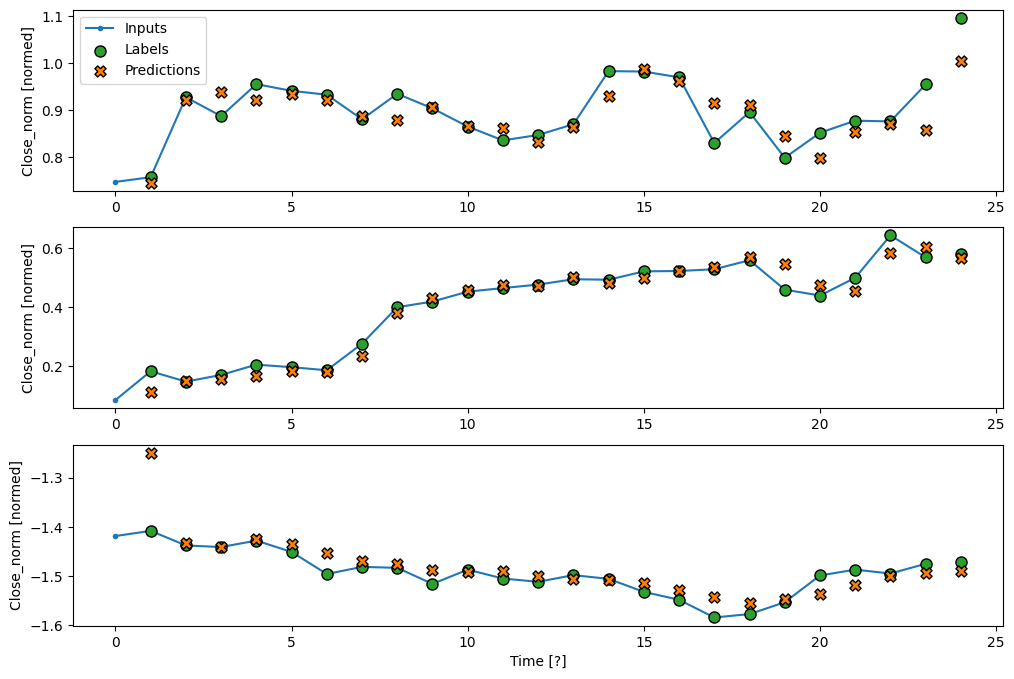

In [307]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

wide_window.plot(model=lstm_model, plot_col='Close_norm')

#### Comparing performances


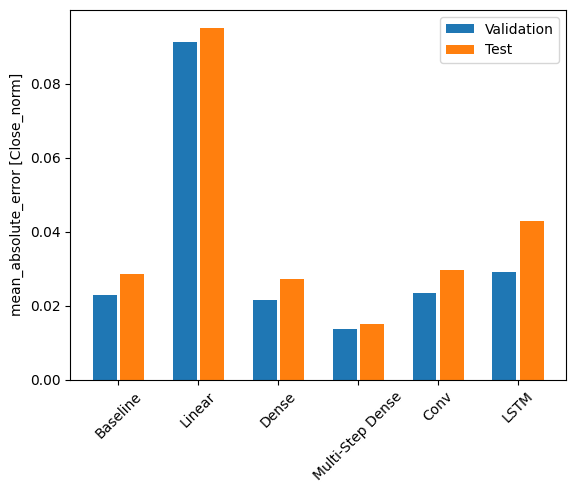

In [311]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plot.ylabel('mean_absolute_error [Close_norm]')
plot.bar(x - 0.17, val_mae, width, label='Validation')
plot.bar(x + 0.17, test_mae, width, label='Test')
plot.xticks(ticks=x, labels=performance.keys(),
            rotation = 45)
_ = plot.legend()
